In [ ]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np

from vae import VAE
from loaddata import LoadData

%matplotlib inline

In [ ]:
def load_model(model, checkpoint_filepath):
    checkpoint = torch.load(checkpoint_filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

def get_sample(dataloader):
    return next(iter(dataloader))

def get_reconstructions(model, sample):
    reconstruction, _ , _ = model(sample)
    return sample, reconstruction

In [ ]:
def image_from_tensor(tensor, index):
    return tensor[index].detach().numpy().reshape(28, -1)

In [ ]:
def plot_reconstructions(num_samples, samples, reconstructions):
    fig = plt.figure(figsize = (2 * num_samples,4))

    for sample_index in range(num_samples):
        image = image_from_tensor(samples, sample_index)
        reconstructed_image = image_from_tensor(reconstructions, sample_index)
        fig.add_subplot(2,num_samples,sample_index + 1)
        plt.imshow(image)
        fig.add_subplot(2,num_samples,num_samples+sample_index + 1)
        plt.imshow(reconstructed_image)

    plt.show()

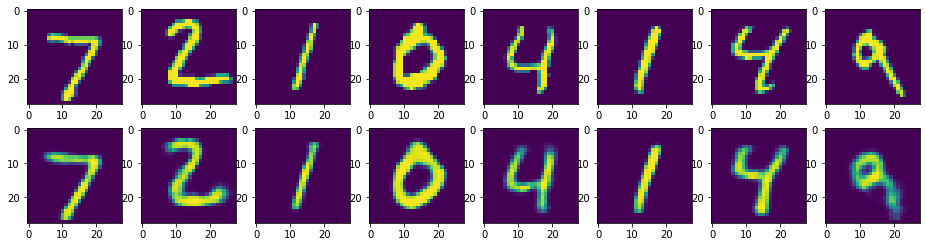

In [55]:
model = VAE(input_dim = 784)
checkpoint_file = "weights.pt"
load_model(model, checkpoint_file)

data = LoadData(datasets.MNIST, batch_size=64)
val_loader = data.validate_loader
sample, _ = get_sample(val_loader)
sample, reconstructions = get_reconstructions(model, sample)

num_samples = 8
plot_reconstructions(num_samples, sample, reconstructions)

In [ ]:
def get_z(model, sample):
    z = model.encode(sample)
    return z
    

In [57]:
train_loader = LoadData(dataset=datasets.MNIST, batch_size=10000).train_loader
sample, labels = get_sample(train_loader)
z = get_z(model, sample)[0]

import umap

map = umap.UMAP().fit_transform(z.detach().numpy())

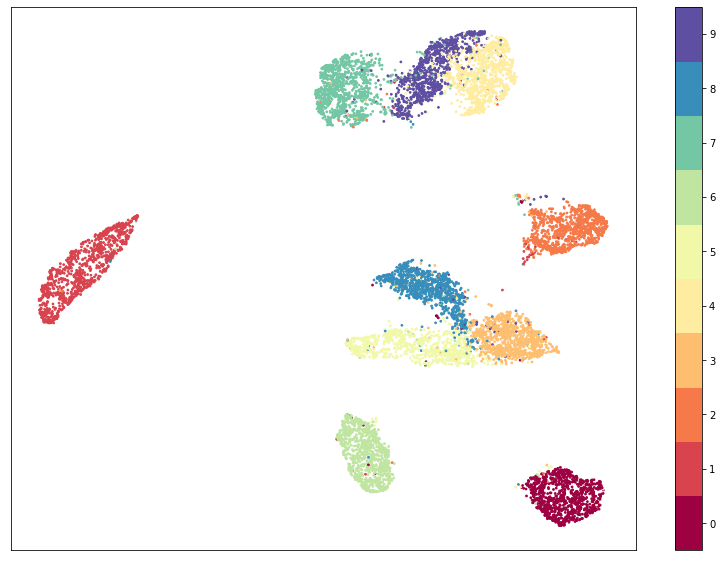

In [58]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*map.T, s=3, c=labels, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))

In [ ]:
plt.scatter(map[:,0], map[:,1], c=labels, cmap='Spectral')
plt.legend(labels)
plt.colorbar()

In [ ]:
with open('trainlogs.npy', 'rb') as f:
    recons_loss = np.load(f, allow_pickle=True)
    kld_loss = np.load(f, allow_pickle=True)
    beta = np.load(f, allow_pickle=True)

plt.plot(recons_loss/50)
plt.plot(kld_loss)
plt.plot(beta*100)